In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [13]:
df = pd.read_csv('/kaggle/input/ssc-exam-result-trends-in-bangladesh-20012025/SSC Result Trends in Bangladesh (20012025).csv')
df.head()

,Year,Total_Examinees,Pass_Rate,GPA_5_Count
0,2001,Null,35.22%,76
1,2002,"7,84,815",42.18%,327
2,2003,"921,024",36.85%,"1,389"
3,2004,"756,387",50.27%,"8,597"
4,2005,"944,015",54.10%,"15,631"


In [4]:
df.shape

(25, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             25 non-null     int64 
 1   Total_Examinees  25 non-null     object
 2   Pass_Rate        25 non-null     object
 3   GPA_5_Count      25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


# Remove commas and % signs, then convert to numbers

In [16]:
# Replace 'Null' with NaN
df.replace('Null', np.nan, inplace=True)

# Now clean and convert the columns
df['Total_Examinees'] = df['Total_Examinees'].str.replace(',', '').astype(float)
df['Pass_Rate'] = df['Pass_Rate'].str.replace('%', '').astype(float)
df['GPA_5_Count'] = df['GPA_5_Count'].str.replace(',', '').astype(float)


# Visualize Key Trends

Trend of Total Examinees Over the Years

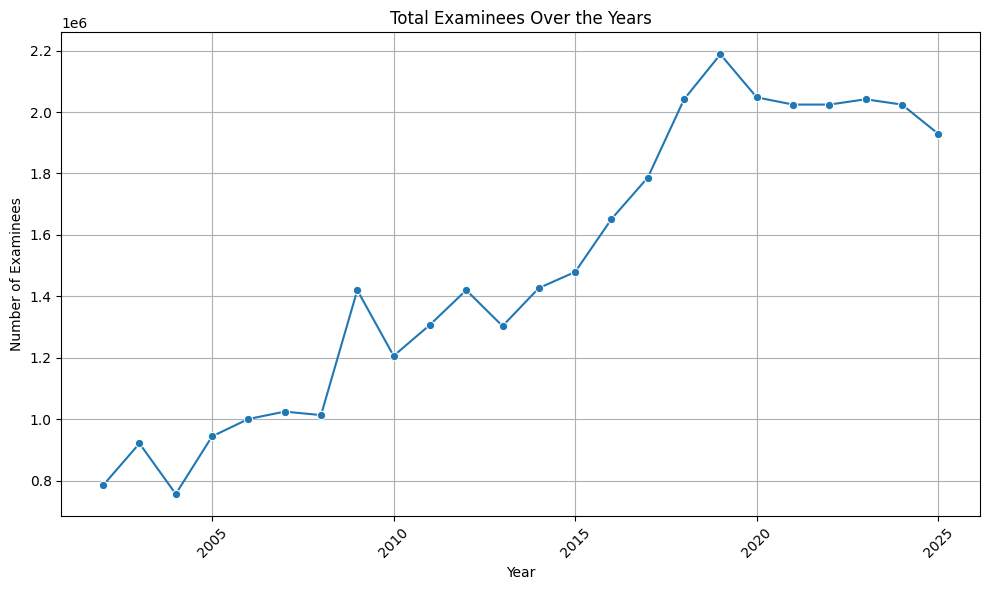

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Total_Examinees', marker='o')
plt.title('Total Examinees Over the Years')
plt.ylabel('Number of Examinees')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

SSC Pass Rate Trend

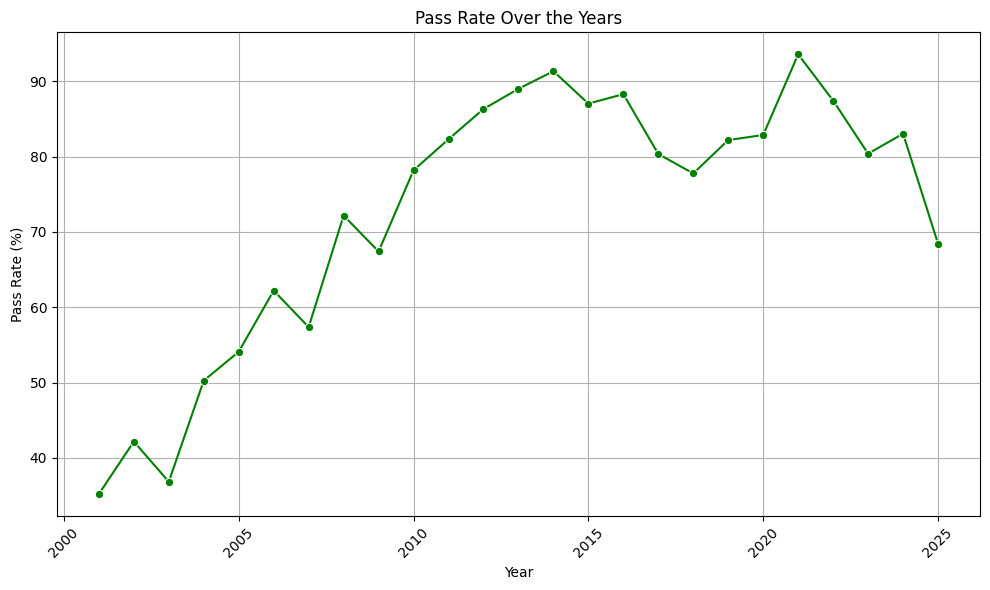

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Pass_Rate', marker='o', color='green')
plt.title('Pass Rate Over the Years')
plt.ylabel('Pass Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

GPA 5 Achievers Over the Years

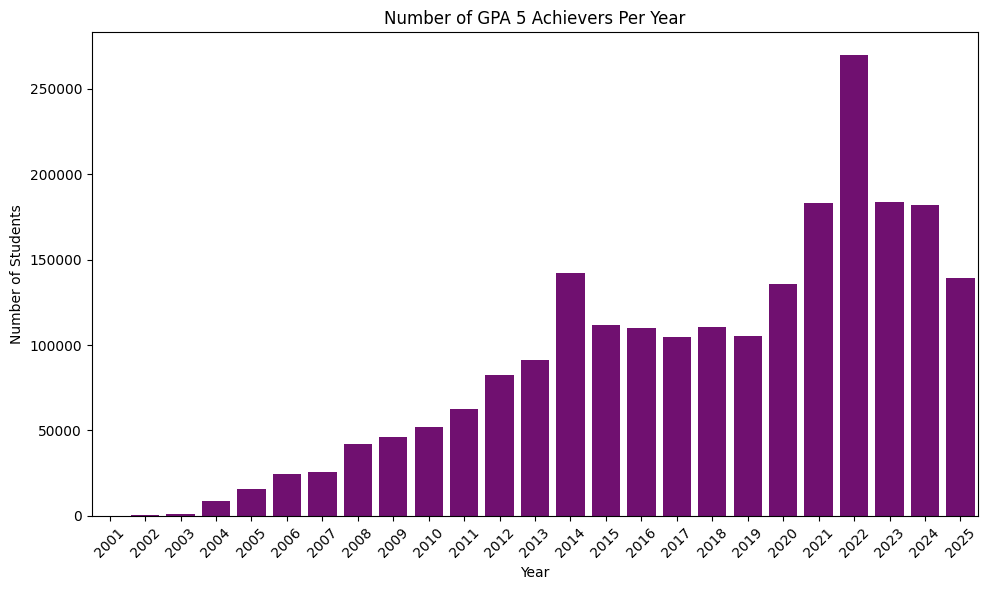

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Year', y='GPA_5_Count', color='purple')
plt.title('Number of GPA 5 Achievers Per Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Analysis & Insights

Check Correlation Between Numerical Features

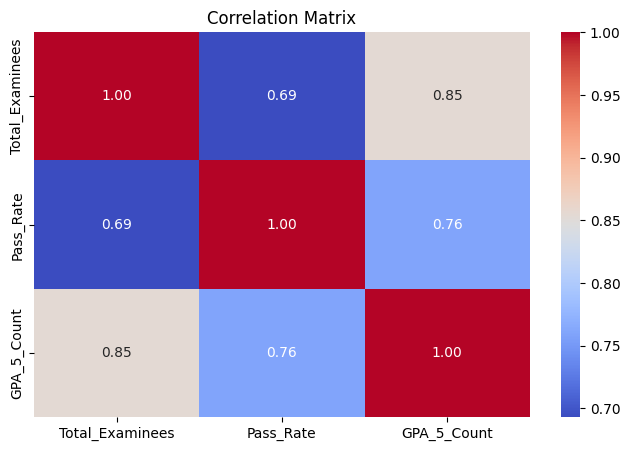

In [18]:
# Compute correlation matrix
corr_matrix = df[['Total_Examinees', 'Pass_Rate', 'GPA_5_Count']].corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Trend Smoothing

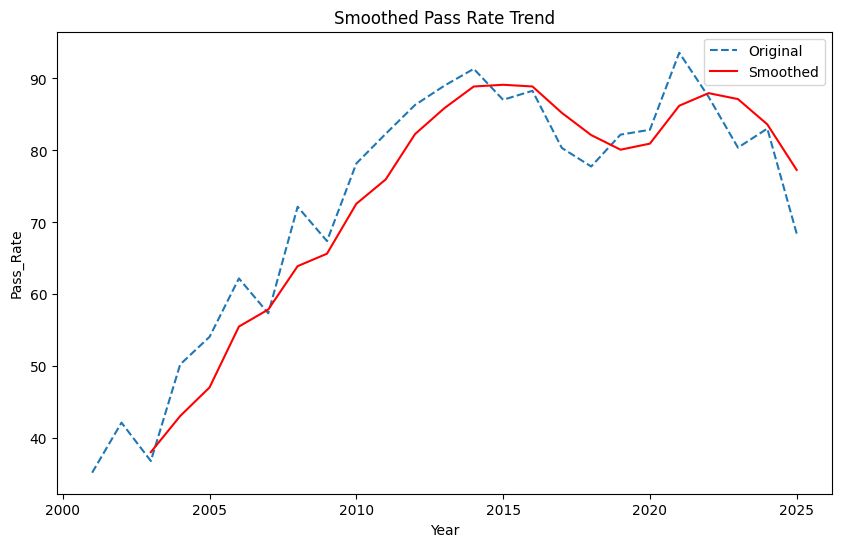

In [19]:
df['Pass_Rate_Smoothed'] = df['Pass_Rate'].rolling(window=3).mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Pass_Rate', label='Original', linestyle='--')
sns.lineplot(data=df, x='Year', y='Pass_Rate_Smoothed', label='Smoothed', color='red')
plt.title("Smoothed Pass Rate Trend")
plt.legend()
plt.show()